Data Source: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Dataset characteristics
=========================================	
	
	instant: record index
	dteday : date
	season : season (1:springer, 2:summer, 3:fall, 4:winter)
	yr : year (0: 2011, 1:2012)
	mnth : month ( 1 to 12)
	hr : hour (0 to 23)
	holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	weekday : day of the week
	workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	hum: Normalized humidity. The values are divided to 100 (max)
	windspeed: Normalized wind speed. The values are divided to 67 (max)
	casual: count of casual users
	registered: count of registered users
	cnt: count of total rental bikes including both casual and registered
	

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
plt.style.use('seaborn')
rentals=pd.read_csv('day.csv')
rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Preprocessing and Feature Engineering

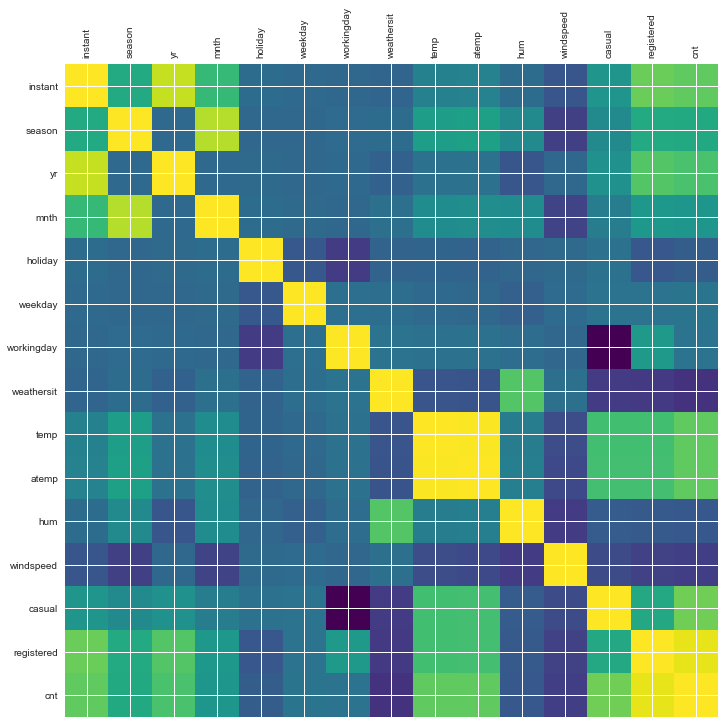

In [2]:
rentals_corr_matrix=rentals.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(rentals_corr_matrix, cmap='viridis')
plt.xticks(range(len(rentals_corr_matrix.columns)), rentals_corr_matrix.columns, rotation='90');
plt.yticks(range(len(rentals_corr_matrix.columns)), rentals_corr_matrix.columns);

In [3]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X, y = rentals.drop(['cnt', 'casual', 'dteday', 'registered'], axis=1), rentals['cnt']

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=123)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\Olak\Data_science_software\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Olak\Data_science_software\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\Olak\Data_science_software\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [6]:
X.shape

(731, 12)

In [7]:
X.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

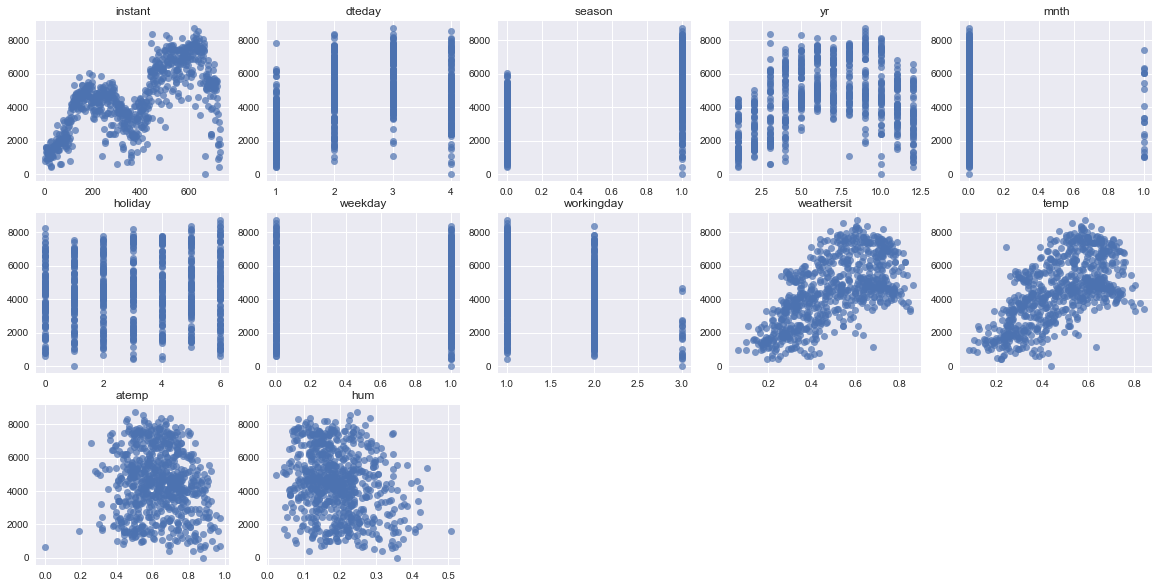

In [59]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 11:
        ax.set_visible(False)
        continue
    ax.plot(X.iloc[:, (i)], y, 'o', alpha=.7)
    ax.set_title(rentals.columns[i])    

#### Plot of scaled trained data

In [10]:
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import cross_val_score


### Linear Regression

In [11]:
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8350502284010222
0.708846055902407


In [12]:
np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5))

0.8096056118361721

In [13]:
from sklearn.model_selection import KFold
np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=KFold(10, shuffle=True)))

0.8188070188002182

In [14]:
np.mean(cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=10))

0.7412531745442236

In [15]:
lr_sc = LinearRegression().fit(X_train_scaled, y_train)
print(lr_sc.score(X_train_scaled, y_train))
print(lr_sc.score(X_test_scaled, y_test))

0.8350502284010222
0.7088460559024072


In [16]:
from sklearn.model_selection import cross_val_predict
y_pred_lin = cross_val_predict(LinearRegression(), X_test_scaled, y_test, cv=5)

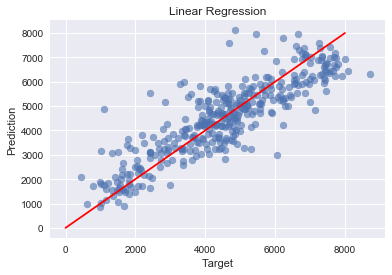

In [17]:
plt.scatter(y_test, y_pred_lin, alpha=.6)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Linear Regression')
plt.plot([0,8000], [0,8000], c='r' )
#line=np.linspace(0, 1000, 100)
#plt.plot(line, lr_sc.predict(line) )

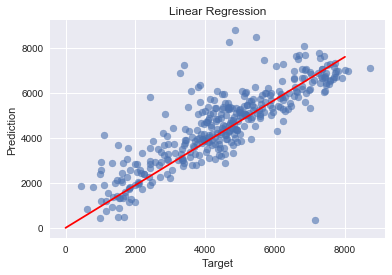

In [18]:
y_pred_lr = lr_sc.predict(X_test_scaled)
plt.scatter(y_test, y_pred_lr, alpha=.6)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Linear Regression')
plt.plot([0,8000], [0,7600], c='r' )

### Ridge Regression

In [19]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=5))

0.802186518498838

In [20]:
rg = Ridge().fit(X_train_scaled, y_train)
print(rg.score(X_train_scaled, y_train))
print(rg.score(X_test_scaled, y_test))

0.8328865366508206
0.7394857256424004


In [21]:
np.mean(cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=5))

0.8086955200383781

In [22]:
np.mean(cross_val_score(RidgeCV(), X_test_scaled, y_test, cv=10))

0.7399172840722639

In [23]:
np.mean(cross_val_score(RidgeCV(), X_test, y_test, cv=10))

0.7406975206684561

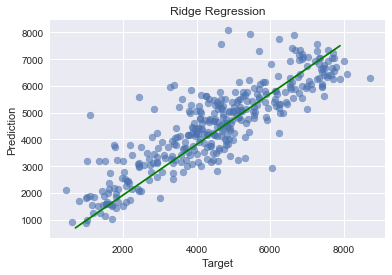

In [24]:
from sklearn.model_selection import cross_val_predict
y_pred_lin = cross_val_predict(RidgeCV(), X_test_scaled, y_test, cv=5)
plt.scatter(y_test, y_pred_lin, alpha=.6)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Ridge Regression')
plt.plot([700,7900], [700,7500], c='g' )


### GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [26]:
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid_ridge.fit(X_train_scaled, y_train)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 0.1}
0.808002247477795


In [27]:
grid_ridge.score(X_train_scaled, y_train)

0.8349434758018989

In [28]:
grid_ridge.score(X_test_scaled, y_test)

0.7151113238360509

In [29]:
pd.DataFrame(grid_ridge.cv_results_).columns
res = pd.pivot_table(pd.DataFrame(grid_ridge.cv_results_), values='mean_test_score', index='param_alpha')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))
res

,mean_test_score
0.001,0.808
0.003,0.808
0.010,0.808
0.032,0.808
0.100,0.808
0.316,0.808
1.000,0.806
3.162,0.803
10.000,0.801
31.623,0.797


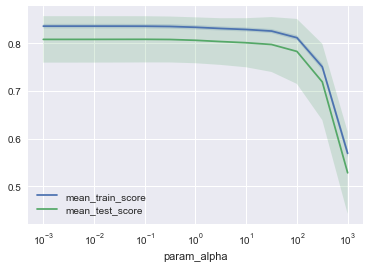

In [30]:
import pandas as pd
bike_results = pd.DataFrame(grid_ridge.cv_results_)
bike_results.plot('param_alpha', 'mean_train_score')
bike_results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(bike_results.param_alpha.astype(np.float),
                 bike_results['mean_train_score'] + bike_results['std_train_score'],
                 bike_results['mean_train_score'] - bike_results['std_train_score'], alpha=0.2)
plt.fill_between(bike_results.param_alpha.astype(np.float),
                 bike_results['mean_test_score'] + bike_results['std_test_score'],
                 bike_results['mean_test_score'] - bike_results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

### Lasso Regression

In [31]:
ls = Lasso(max_iter=5000).fit(X_train_scaled, y_train)
print(ls.score(X_train_scaled, y_train))
print(ls.score(X_test_scaled, y_test))

0.8344691141411658
0.7192279413701073


In [32]:
np.mean(cross_val_score(Lasso(max_iter=50000), X_train_scaled, y_train, cv=5))

0.8096526919915605

In [33]:
np.mean(cross_val_score(LassoCV(max_iter=50000, cv=5), X_train_scaled, y_train, cv=5))

0.8068687126434471

In [34]:
np.mean(cross_val_score(LassoCV(max_iter=50000, cv=10), X_test_scaled, y_test, cv=5))

0.7324490543149047

In [35]:
param_grid_lasso = {'alpha': np.logspace(-3, 0, 13)}
grid_lasso = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid_lasso, cv=10, return_train_score=True, iid=False)
grid_lasso.fit(X_train_scaled, y_train)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)
print(grid_lasso.score(X_test_scaled, y_test))

{'alpha': 0.001}
0.8078334160293128
0.709046959230877


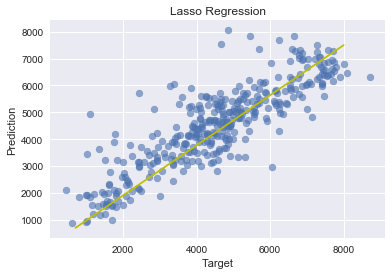

In [36]:
from sklearn.model_selection import cross_val_predict
y_pred_lin = cross_val_predict(LassoCV(max_iter=5000, cv=5), X_test_scaled, y_test, cv=5)
plt.scatter(y_test, y_pred_lin, alpha=.6)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Lasso Regression')
plt.plot([700,8000], [700,7500], c='y' )

### ElasticNetCV

In [37]:
en = ElasticNetCV(cv=15).fit(X_train_scaled, y_train)
print(en.score(X_train_scaled, y_train))
print(en.score(X_test_scaled, y_test))

0.7050362411846522
0.6734721236896792


In [38]:
print(np.mean(cross_val_score(ElasticNetCV(max_iter=1000, cv=5), X_train_scaled, y_train, cv=5)))
print(np.mean(cross_val_score(ElasticNetCV(max_iter=1000, cv=5), X_test_scaled, y_test, cv=10)))

0.6794624256178382
0.6383851827237436


In [39]:
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': np.logspace(-3, -1, 10), 'l1_ratio':[0.01, .1, .9, 
.98, 1]}

grid_enet = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid_enet.fit(X_train_scaled, y_train)
print(grid_enet.best_params_)
print(grid_enet.best_score_)
print(grid_enet.score(X_test_scaled, y_test))

{'alpha': 0.001, 'l1_ratio': 1}
0.8078334160293128
0.709046959230877


# Feature importances
### Feature importances with tree regressor

Feature ranking:
1. instant (0.255161)
2. season (0.198591)
3. yr (0.174551)
4. mnth (0.123966)
5. holiday (0.098159)
6. weekday (0.046458)
7. workingday (0.029919)
8. weathersit (0.027935)
9. temp (0.016661)
10. atemp (0.014733)
11. hum (0.011508)
12. windspeed (0.002360)


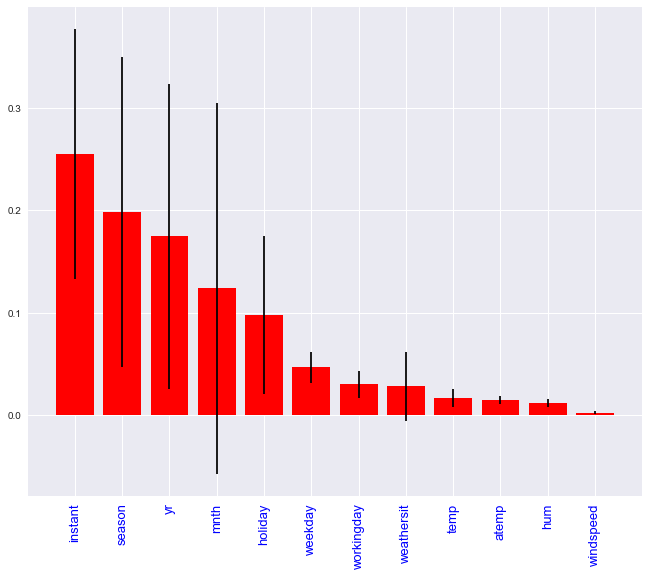

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




forest = ExtraTreesRegressor(n_estimators=250, random_state=123)

forest.fit(X_train_scaled, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


                                                    
ticks=[]
plt.figure(figsize=(11,9))
indices2list=indices.tolist()
col=X.columns.tolist()
col2dict = dict(zip(col, range(0,12)))
for indices2list in col2dict:
    ticks.append(indices2list)
    
# Print the feature ranking    
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    print("%d. %s (%f)" % (f + 1, ticks[f],  importances[indices[f]]))

plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(0,12), ticks, rotation=90, fontsize=13, color='b')

plt.show()

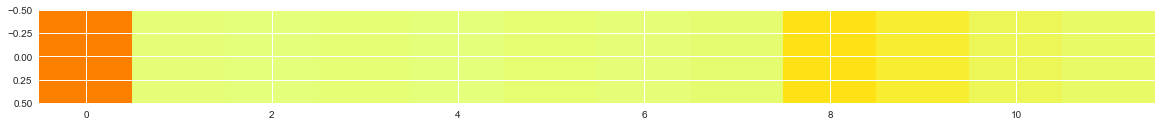

In [43]:
rfor = RandomForestRegressor(n_estimators=300, n_jobs=1)
rfor.fit(X_train_scaled, y_train)
#print(rfor.feature_importances_)  # one value per feature

plt.figure(figsize=(20,50))
plt.imshow(rfor.feature_importances_.reshape(1, -1), cmap='Wistia', interpolation='nearest')

In [44]:
pred_y = rfor.predict(X_test)

print("Random Forest Training Accuracy:", rfor.score(X_train_scaled, y_train).round(5))
print("Random Forest Test Accuracy:    ", rfor.score(X_test_scaled, y_test).round(5))

Random Forest Training Accuracy: 0.98505
Random Forest Test Accuracy:     0.83271


In [47]:
from sklearn.feature_selection import SelectFromModel

lasso_select = Lasso(alpha=.1).fit(X_train_scaled, y_train)

select = SelectFromModel(lasso_select, prefit=True)

X_selected = np.hstack([X_train_scaled, select.transform(X_train)])

C:\Users\Olak\Data_science_software\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [48]:
X_selected.shape

(365, 24)

In [49]:
scores = cross_val_score(RidgeCV(), X_selected, y_train, cv=5)
np.mean(scores), np.std(scores)

(0.8099125084847248, 0.03526123972069986)

#### RANSACRegressor

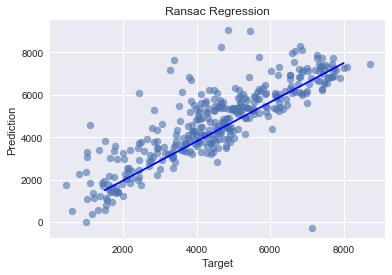

In [53]:
from sklearn.linear_model import RANSACRegressor

model_ransac_reg = RANSACRegressor()

model_ransac_reg.fit(X_train_scaled, y_train)
inlier_mask = model_ransac_reg.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_y_ransac_reg = model_ransac_reg.predict(X_test_scaled)


plt.scatter(y_test, line_y_ransac_reg, alpha=.6)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Ransac Regression')
plt.plot([1500,8000], [1500,7500], c='b' )

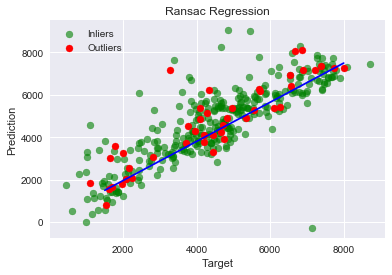

In [54]:
plt.scatter(y_test[1:][inlier_mask], line_y_ransac_reg[1:][inlier_mask], color='green', marker='o',
            label='Inliers', alpha=.6)
plt.scatter(y_test[1:][outlier_mask], line_y_ransac_reg[1:][outlier_mask], color='red', marker='o',
            label='Outliers')

plt.legend(loc='best')

plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Ransac Regression')
plt.plot([1500,8000], [1500,7500], c='b' )
